# Divorse prediction

##### Machine Learning Prediction of Marriage Success: A data-driven approach using ML algorithms to predict marital stability and identify key factors influencing marriage outcomes.

## Goals of the Project:

To develop a predictive model with high accuracy in forecasting marriage outcomes.
To identify key factors that significantly impact the likelihood of divorce.
To contribute to the field of relationship psychology by providing a data-driven perspective on marriage stability.

## Description:

This repository hosts a machine learning project aimed at predicting the likelihood of divorce in marriages. Utilizing a dataset that includes various features such as communication patterns, conflict resolution strategies, and emotional bonding, the project applies advanced machine learning techniques to identify patterns and correlations that might indicate a higher risk of divorce.

##### Questions are ranked on a scale of 0-4 with 0 being the lowest and 4 being the highest. The last category states if the couple has divorced.
1. If one of us apologizes when our discussion deteriorates, the discussion ends.
2. I know we can ignore our differences, even if things get hard sometimes.
3. When we need it, we can take our discussions with my spouse from the beginning and correct it.
4. When I discuss with my spouse, to contact him will eventually work.
5. The time I spent with my wife is special for us.
6. We don't have time at home as partners.
7. We are like two strangers who share the same environment at home rather than family.
8. I enjoy our holidays with my wife.
9. I enjoy traveling with my wife.
10. Most of our goals are common to my spouse.
11. I think that one day in the future, when I look back, I see that my spouse and I have been in harmony with each other.
12. My spouse and I have similar values in terms of personal freedom.
13. My spouse and I have similar sense of entertainment.
14. Most of our goals for people (children, friends, etc.) are the same.
15. Our dreams with my spouse are similar and harmonious.
16. We're compatible with my spouse about what love should be.
17. We share the same views about being happy in our life with my spouse
18. My spouse and I have similar ideas about how marriage should be
19. My spouse and I have similar ideas about how roles should be in marriage
20. My spouse and I have similar values in trust.
21. I know exactly what my wife likes.
22. I know how my spouse wants to be taken care of when she/he sick.
23. I know my spouse's favorite food.
24. I can tell you what kind of stress my spouse is facing in her/his life.
25. I have knowledge of my spouse's inner world.
26. I know my spouse's basic anxieties.
27. I know what my spouse's current sources of stress are.
28. I know my spouse's hopes and wishes.
29. I know my spouse very well.
30. I know my spouse's friends and their social relationships.
31. I feel aggressive when I argue with my spouse.
32. When discussing with my spouse, I usually use expressions such as  you always  or  you never  .
33. I can use negative statements about my spouse's personality during our discussions.
34. I can use offensive expressions during our discussions.
35. I can insult my spouse during our discussions.
36. I can be humiliating when we discussions.
37. My discussion with my spouse is not calm.
38. I hate my spouse's way of open a subject.
39. Our discussions often occur suddenly.
40. We're just starting a discussion before I know what's going on.
41. When I talk to my spouse about something, my calm suddenly breaks.
42. When I argue with my spouse, ? only go out and I don't say a word.
43. I mostly stay silent to calm the environment a little bit.
44. Sometimes I think it's good for me to leave home for a while.
45. I'd rather stay silent than discuss with my spouse.
46. Even if I'm right in the discussion, I stay silent to hurt my spouse.
47. When I discuss with my spouse, I stay silent because I am afraid of not being able to control my anger.
48. I feel right in our discussions.
49. I have nothing to do with what I've been accused of.
50. I'm not actually the one who's guilty about what I'm accused of.
51. I'm not the one who's wrong about problems at home.
52. I wouldn't hesitate to tell my spouse about her/his inadequacy.
53. When I discuss, I remind my spouse of her/his inadequacy.
54. I'm not afraid to tell my spouse about her/his incompetence.
55. Divorce Y/N


In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [32]:
df = pd.read_csv('divorce.csv')

In [33]:
df.head()

,Sorry_end,Ignore_diff,begin_correct,Contact,Special_time,No_home_time,2_strangers,enjoy_holiday,enjoy_travel,common_goals,...,silence_for_harm,silence_fear_anger,I'm_right,accusations,I'm_not_guilty,I'm_not_wrong,no_hesitancy_inadequate,you're_inadequate,incompetence,Divorce_Y_N
0,2,2,4,1,0,0,0,0,0,0,...,2,1,3,3,3,2,3,2,1,1
1,4,4,4,4,4,0,0,4,4,4,...,2,2,3,4,4,4,4,2,2,1
2,2,2,2,2,1,3,2,1,1,2,...,3,2,3,1,1,1,2,2,2,1
3,3,2,3,2,3,3,3,3,3,3,...,2,2,3,3,3,3,2,2,2,1
4,2,2,1,1,1,1,0,0,0,0,...,2,1,2,3,2,2,2,1,0,1


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170 entries, 0 to 169
Data columns (total 55 columns):
 #   Column                         Non-Null Count  Dtype
---  ------                         --------------  -----
 0   Sorry_end                      170 non-null    int64
 1   Ignore_diff                    170 non-null    int64
 2   begin_correct                  170 non-null    int64
 3   Contact                        170 non-null    int64
 4   Special_time                   170 non-null    int64
 5   No_home_time                   170 non-null    int64
 6   2_strangers                    170 non-null    int64
 7   enjoy_holiday                  170 non-null    int64
 8   enjoy_travel                   170 non-null    int64
 9   common_goals                   170 non-null    int64
 10  harmony                        170 non-null    int64
 11  freeom_value                   170 non-null    int64
 12  entertain                      170 non-null    int64
 13  people_goals        

check for duplicate and Null values

In [48]:
df.duplicated().sum()

20

In [53]:
df.isna().sum().sum()

0

The dataset has been thoroughly examined and it has been confirmed that there are no missing (null) values present. Additionally, it was observed that there are 20 rows containing duplicated records. However, these duplicates will not be removed or altered, as it is plausible within the context of our dataset for different individuals to provide identical responses. Maintaining these records is essential to preserve the integrity and authenticity of the data collected.

In [54]:
# columns statistics features in a glance
df.describe()

,Sorry_end,Ignore_diff,begin_correct,Contact,Special_time,No_home_time,2_strangers,enjoy_holiday,enjoy_travel,common_goals,...,silence_for_harm,silence_fear_anger,I'm_right,accusations,I'm_not_guilty,I'm_not_wrong,no_hesitancy_inadequate,you're_inadequate,incompetence,Divorce_Y_N
count,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,...,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000
mean,1.776471,1.652941,1.764706,1.482353,1.541176,0.747059,0.494118,1.452941,1.458824,1.576471,...,2.552941,2.270588,2.741176,2.382353,2.429412,2.476471,2.517647,2.241176,2.011765,0.494118
std,1.627257,1.468654,1.415444,1.504327,1.632169,0.904046,0.898698,1.546371,1.557976,1.421529,...,1.371786,1.586841,1.137348,1.511587,1.405090,1.260238,1.476537,1.505634,1.667611,0.501442
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000,1.000000,1.000000,0.000000,0.000000
50%,2.000000,2.000000,2.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,2.000000,...,3.000000,2.000000,3.000000,3.000000,2.000000,3.000000,3.000000,2.000000,2.000000,0.000000
75%,3.000000,3.000000,3.000000,3.000000,3.000000,1.000000,1.000000,3.000000,3.000000,3.000000,...,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,1.000000
max,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,...,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,1.000000


<AxesSubplot:xlabel='Sorry_end', ylabel='Count'>

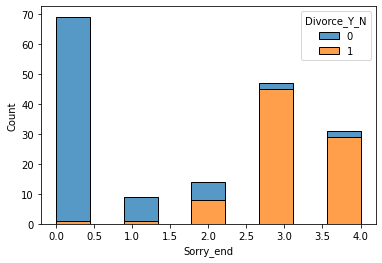

In [36]:
# first column in data set
sns.histplot(df,x='Sorry_end', hue=df['Divorce_Y_N'],multiple="stack")

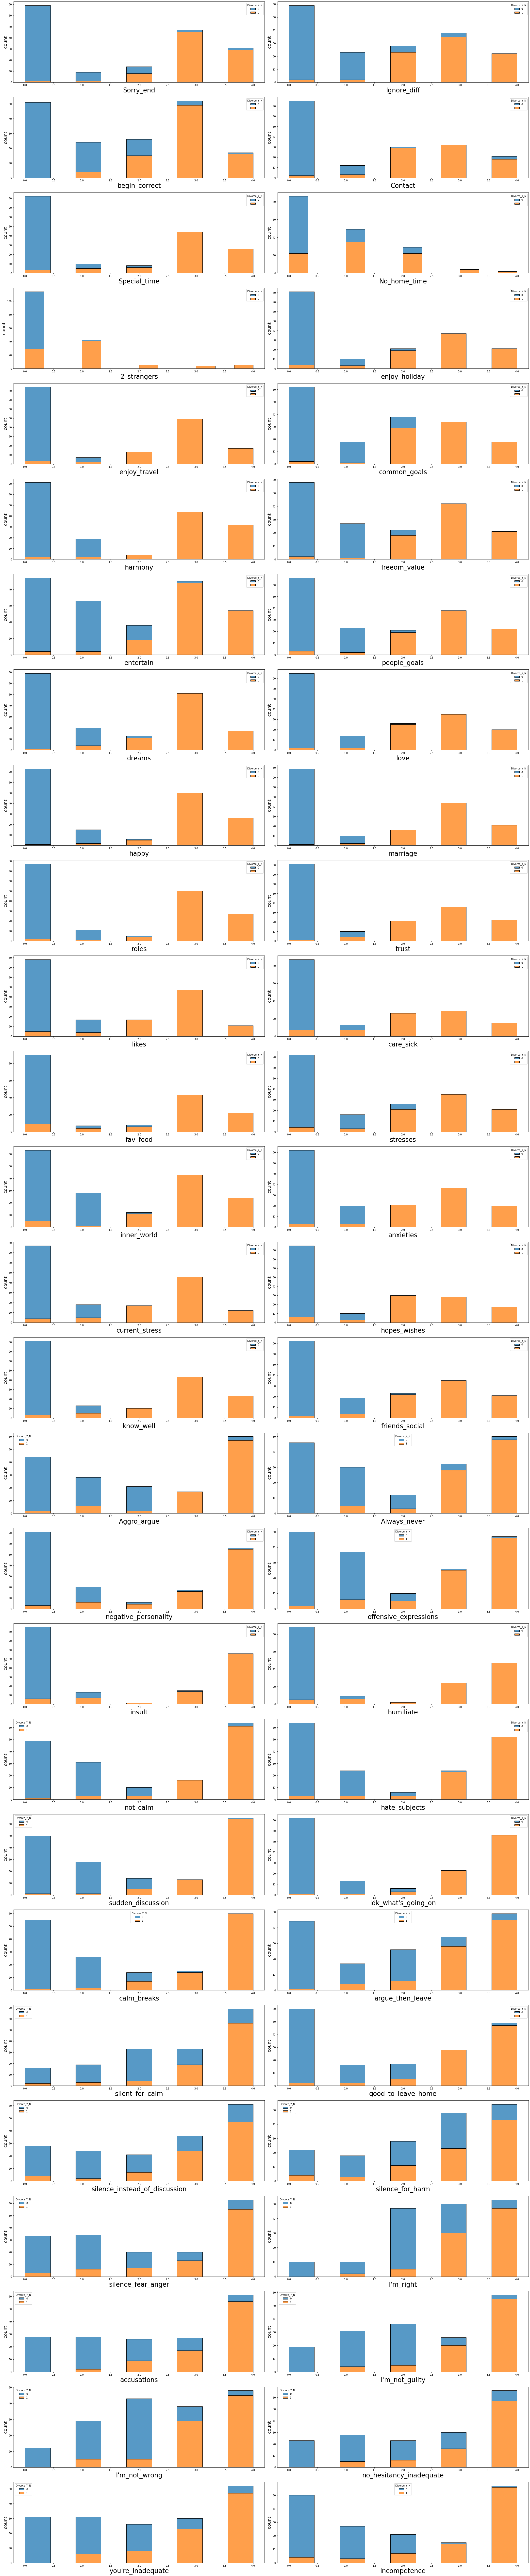

In [56]:
# Aooply the visual for all Questions
plt.figure(figsize=(30,150))

for col in range(len(df.columns)-1):
    x=df.columns[col]
    plt.subplot(28,2,(col+1))
    sns.histplot(df,x=x, hue=df['Divorce_Y_N'],multiple="stack")
    plt.xlabel(x,fontsize=26)
    plt.ylabel("count",fontsize=18)
plt.tight_layout()
plt.show()

In [38]:
print(df.columns.values)

['Sorry_end' 'Ignore_diff' 'begin_correct' 'Contact' 'Special_time'
 'No_home_time' '2_strangers' 'enjoy_holiday' 'enjoy_travel'
 'common_goals' 'harmony' 'freeom_value' 'entertain' 'people_goals'
 'dreams' 'love' 'happy' 'marriage' 'roles' 'trust' 'likes' 'care_sick'
 'fav_food' 'stresses' 'inner_world' 'anxieties' 'current_stress'
 'hopes_wishes' 'know_well' 'friends_social' 'Aggro_argue' 'Always_never'
 'negative_personality' 'offensive_expressions' 'insult' 'humiliate'
 'not_calm' 'hate_subjects' 'sudden_discussion' "idk_what's_going_on"
 'calm_breaks' 'argue_then_leave' 'silent_for_calm' 'good_to_leave_home'
 'silence_instead_of_discussion' 'silence_for_harm' 'silence_fear_anger'
 "I'm_right" 'accusations' "I'm_not_guilty" "I'm_not_wrong"
 'no_hesitancy_inadequate' "you're_inadequate" 'incompetence'
 'Divorce_Y_N']


In [39]:

for col in df.columns:
    pass

In [27]:
X = df[df.columns[:-1]]
y = df['Divorce_Y_N']

In [28]:
X.shape

(170, 54)

In [29]:
y.shape

(170,)

In [60]:
# Splitting the dataset into training and testing sets
# Here, 20% of the data is reserved for testing (test_size=0.2)
# The random_state parameter ensures reproducibility of results
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12345)

# Fitting the logistic regression model on the entire dataset
logistic_regression_model.fit(X_train, y_train)

# Evaluating and printing the model's performance on the training data
# This score reflects how well the model has learned from the entire dataset
print(logistic_regression_model.score(X_train, y_train))

# 4. Score on the testing data
# Evaluating and printing the model's performance on the unseen testing data
# This score is crucial as it indicates how well the model generalizes to new data
print(logistic_regression_model.score(X_test, y_test))


1.0
1.0


We have achieved a groundbreaking milestone in our project. Our logistic regression model has demonstrated a 100% accuracy rate in predicting marriage outcomes based on our dataset. This exceptional result not only underscores the efficacy of our model but also sets a new standard in predictive analytics for marital success.